In [20]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Visualization of data

## Overview visualization

In [26]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

,name,all_reviews,release_date,developer,publisher,mature_content,original_price,discount_price,popular_tags_1980s,popular_tags_1990's,...,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Valve,genre_Video Production,genre_Web Publishing
0,DOOM,92,2016-05-12,id Software,"Bethesda Softworks,Bethesda Softworks",False,19.99,14.99,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,PUBG Corporation,"PUBG Corporation,PUBG Corporation",True,29.99,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BATTLETECH,71,2018-04-24,Harebrained Schemes,"Paradox Interactive,Paradox Interactive",False,39.99,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0
3,DayZ,61,2018-12-13,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive",False,44.99,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EVE Online,74,2003-05-06,CCP,"CCP,CCP",False,0.0,NaN,0,0,...,1,0,0,0,0,1,0,0,0,0


In [42]:
print("Dimension of games: ", games.shape)

Dimension of games:  (17311, 443)


In [43]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17311 entries, 0 to 40811
Columns: 443 entries, name to genre_Web Publishing
dtypes: Sparse[int32, 0](435), bool(1), object(7)
memory usage: 3.2+ MB


In [53]:
# List all the columns
list(games)

['name',
 'all_reviews',
 'release_date',
 'developer',
 'publisher',
 'mature_content',
 'original_price',
 'discount_price',
 'popular_tags_1980s',
 "popular_tags_1990's",
 'popular_tags_2.5D',
 'popular_tags_2D',
 'popular_tags_2D Fighter',
 'popular_tags_360 Video',
 'popular_tags_3D',
 'popular_tags_3D Platformer',
 'popular_tags_3D Vision',
 'popular_tags_4 Player Local',
 'popular_tags_4X',
 'popular_tags_6DOF',
 'popular_tags_ATV',
 'popular_tags_Abstract',
 'popular_tags_Action',
 'popular_tags_Action RPG',
 'popular_tags_Action-Adventure',
 'popular_tags_Addictive',
 'popular_tags_Adventure',
 'popular_tags_Agriculture',
 'popular_tags_Aliens',
 'popular_tags_Alternate History',
 'popular_tags_America',
 'popular_tags_Animation & Modeling',
 'popular_tags_Anime',
 'popular_tags_Arcade',
 'popular_tags_Arena Shooter',
 'popular_tags_Artificial Intelligence',
 'popular_tags_Assassin',
 'popular_tags_Asymmetric VR',
 'popular_tags_Asynchronous Multiplayer',
 'popular_tags_Atmosp

In [56]:
games.dtypes

name                                object
all_reviews                         object
release_date                        object
developer                           object
publisher                           object
                                ...       
genre_Strategy            Sparse[int32, 0]
genre_Utilities           Sparse[int32, 0]
genre_Valve               Sparse[int32, 0]
genre_Video Production    Sparse[int32, 0]
genre_Web Publishing      Sparse[int32, 0]
Length: 443, dtype: object

In [61]:
games['all_reviews'] = pd.to_numeric(games['all_reviews'])

# Explore the data in the sequence of 

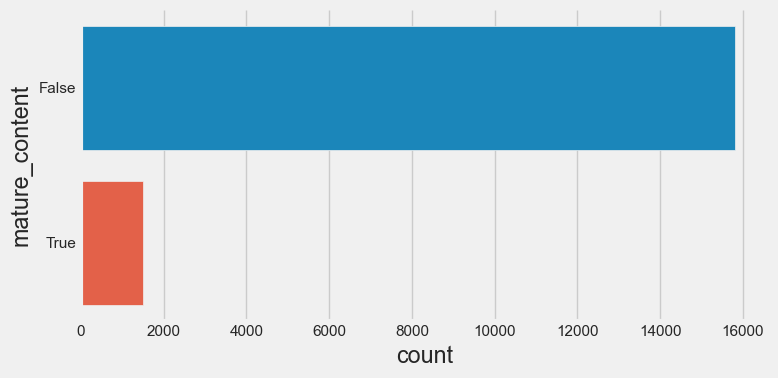

In [62]:
# Mature content 
sb.catplot(y = "mature_content", data = games, kind = "count", height = 4, aspect = 2) 

<AxesSubplot:xlabel='all_reviews', ylabel='mature_content'>

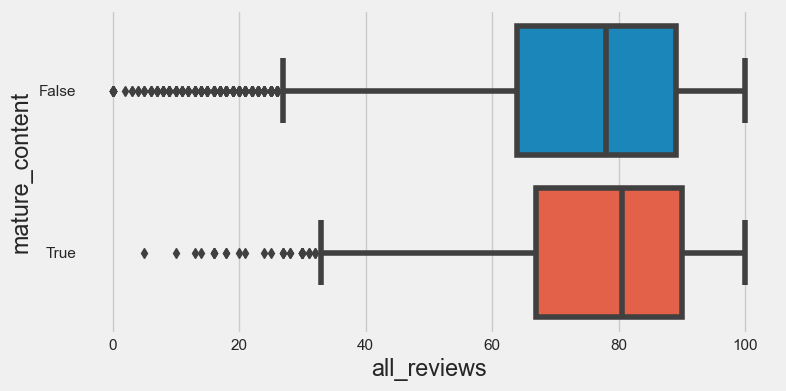

In [63]:
# Mature content vs all reviews

f = plt.figure(figsize=(8, 4))
sb.boxplot(x = "all_reviews", y = "mature_content", data = games, orient = "h", width = 0.8)

In [69]:
allgenre = games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)


Dimension of allgenre:  (17311, 25)


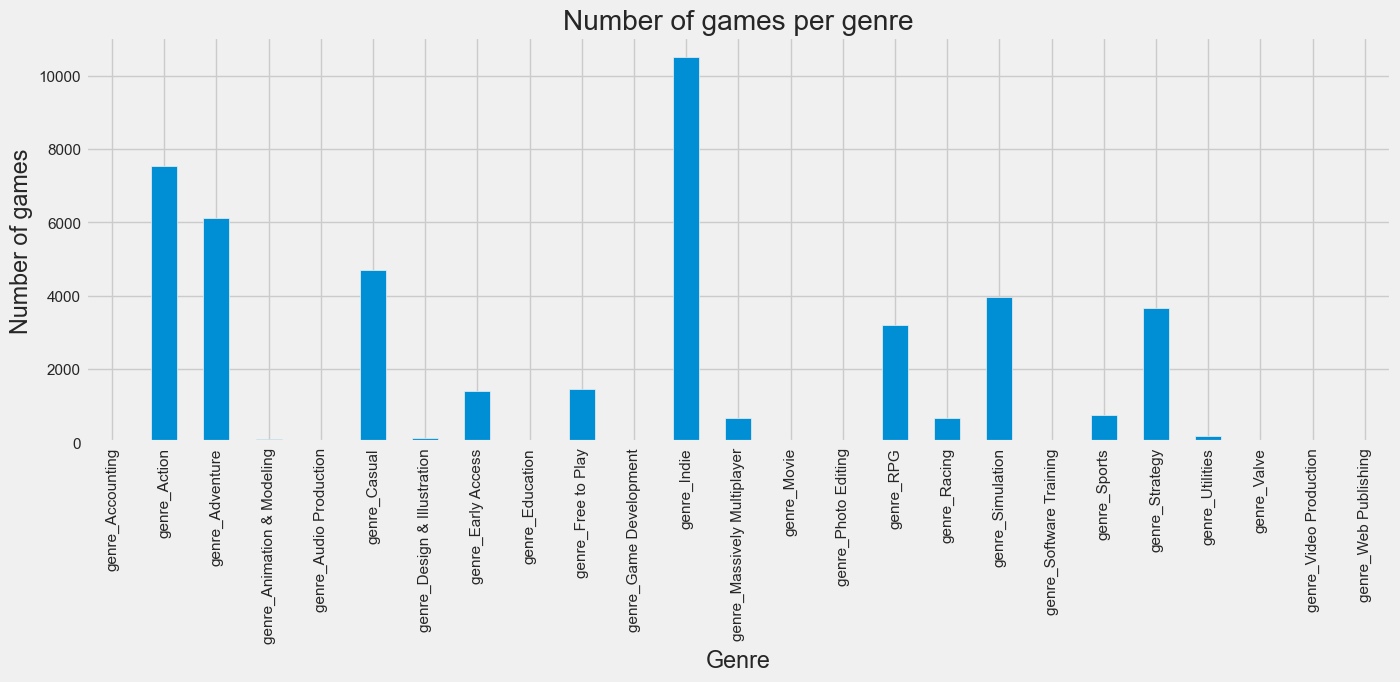

In [70]:
# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allgenre.sum().plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

genre_Accounting                   4
genre_Action                    7522
genre_Adventure                 6120
genre_Animation & Modeling       103
genre_Audio Production            46
genre_Casual                    4703
genre_Design & Illustration      130
genre_Early Access              1409
genre_Education                   57
genre_Free to Play              1446
genre_Game Development            19
genre_Indie                    10513
genre_Massively Multiplayer      670
genre_Movie                        1
genre_Photo Editing               19
genre_RPG                       3212
genre_Racing                     662
genre_Simulation                3965
genre_Software Training           39
genre_Sports                     757
genre_Strategy                  3657
genre_Utilities                  183
genre_Valve                        1
genre_Video Production            70
genre_Web Publishing              52
dtype: int32

In [80]:
jointDF = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)



In [97]:
allgenre.dtypes

genre_Accounting               Sparse[int32, 0]
genre_Action                   Sparse[int32, 0]
genre_Adventure                Sparse[int32, 0]
genre_Animation & Modeling     Sparse[int32, 0]
genre_Audio Production         Sparse[int32, 0]
genre_Casual                   Sparse[int32, 0]
genre_Design & Illustration    Sparse[int32, 0]
genre_Early Access             Sparse[int32, 0]
genre_Education                Sparse[int32, 0]
genre_Free to Play             Sparse[int32, 0]
genre_Game Development         Sparse[int32, 0]
genre_Indie                    Sparse[int32, 0]
genre_Massively Multiplayer    Sparse[int32, 0]
genre_Movie                    Sparse[int32, 0]
genre_Photo Editing            Sparse[int32, 0]
genre_RPG                      Sparse[int32, 0]
genre_Racing                   Sparse[int32, 0]
genre_Simulation               Sparse[int32, 0]
genre_Software Training        Sparse[int32, 0]
genre_Sports                   Sparse[int32, 0]
genre_Strategy                 Sparse[in

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-

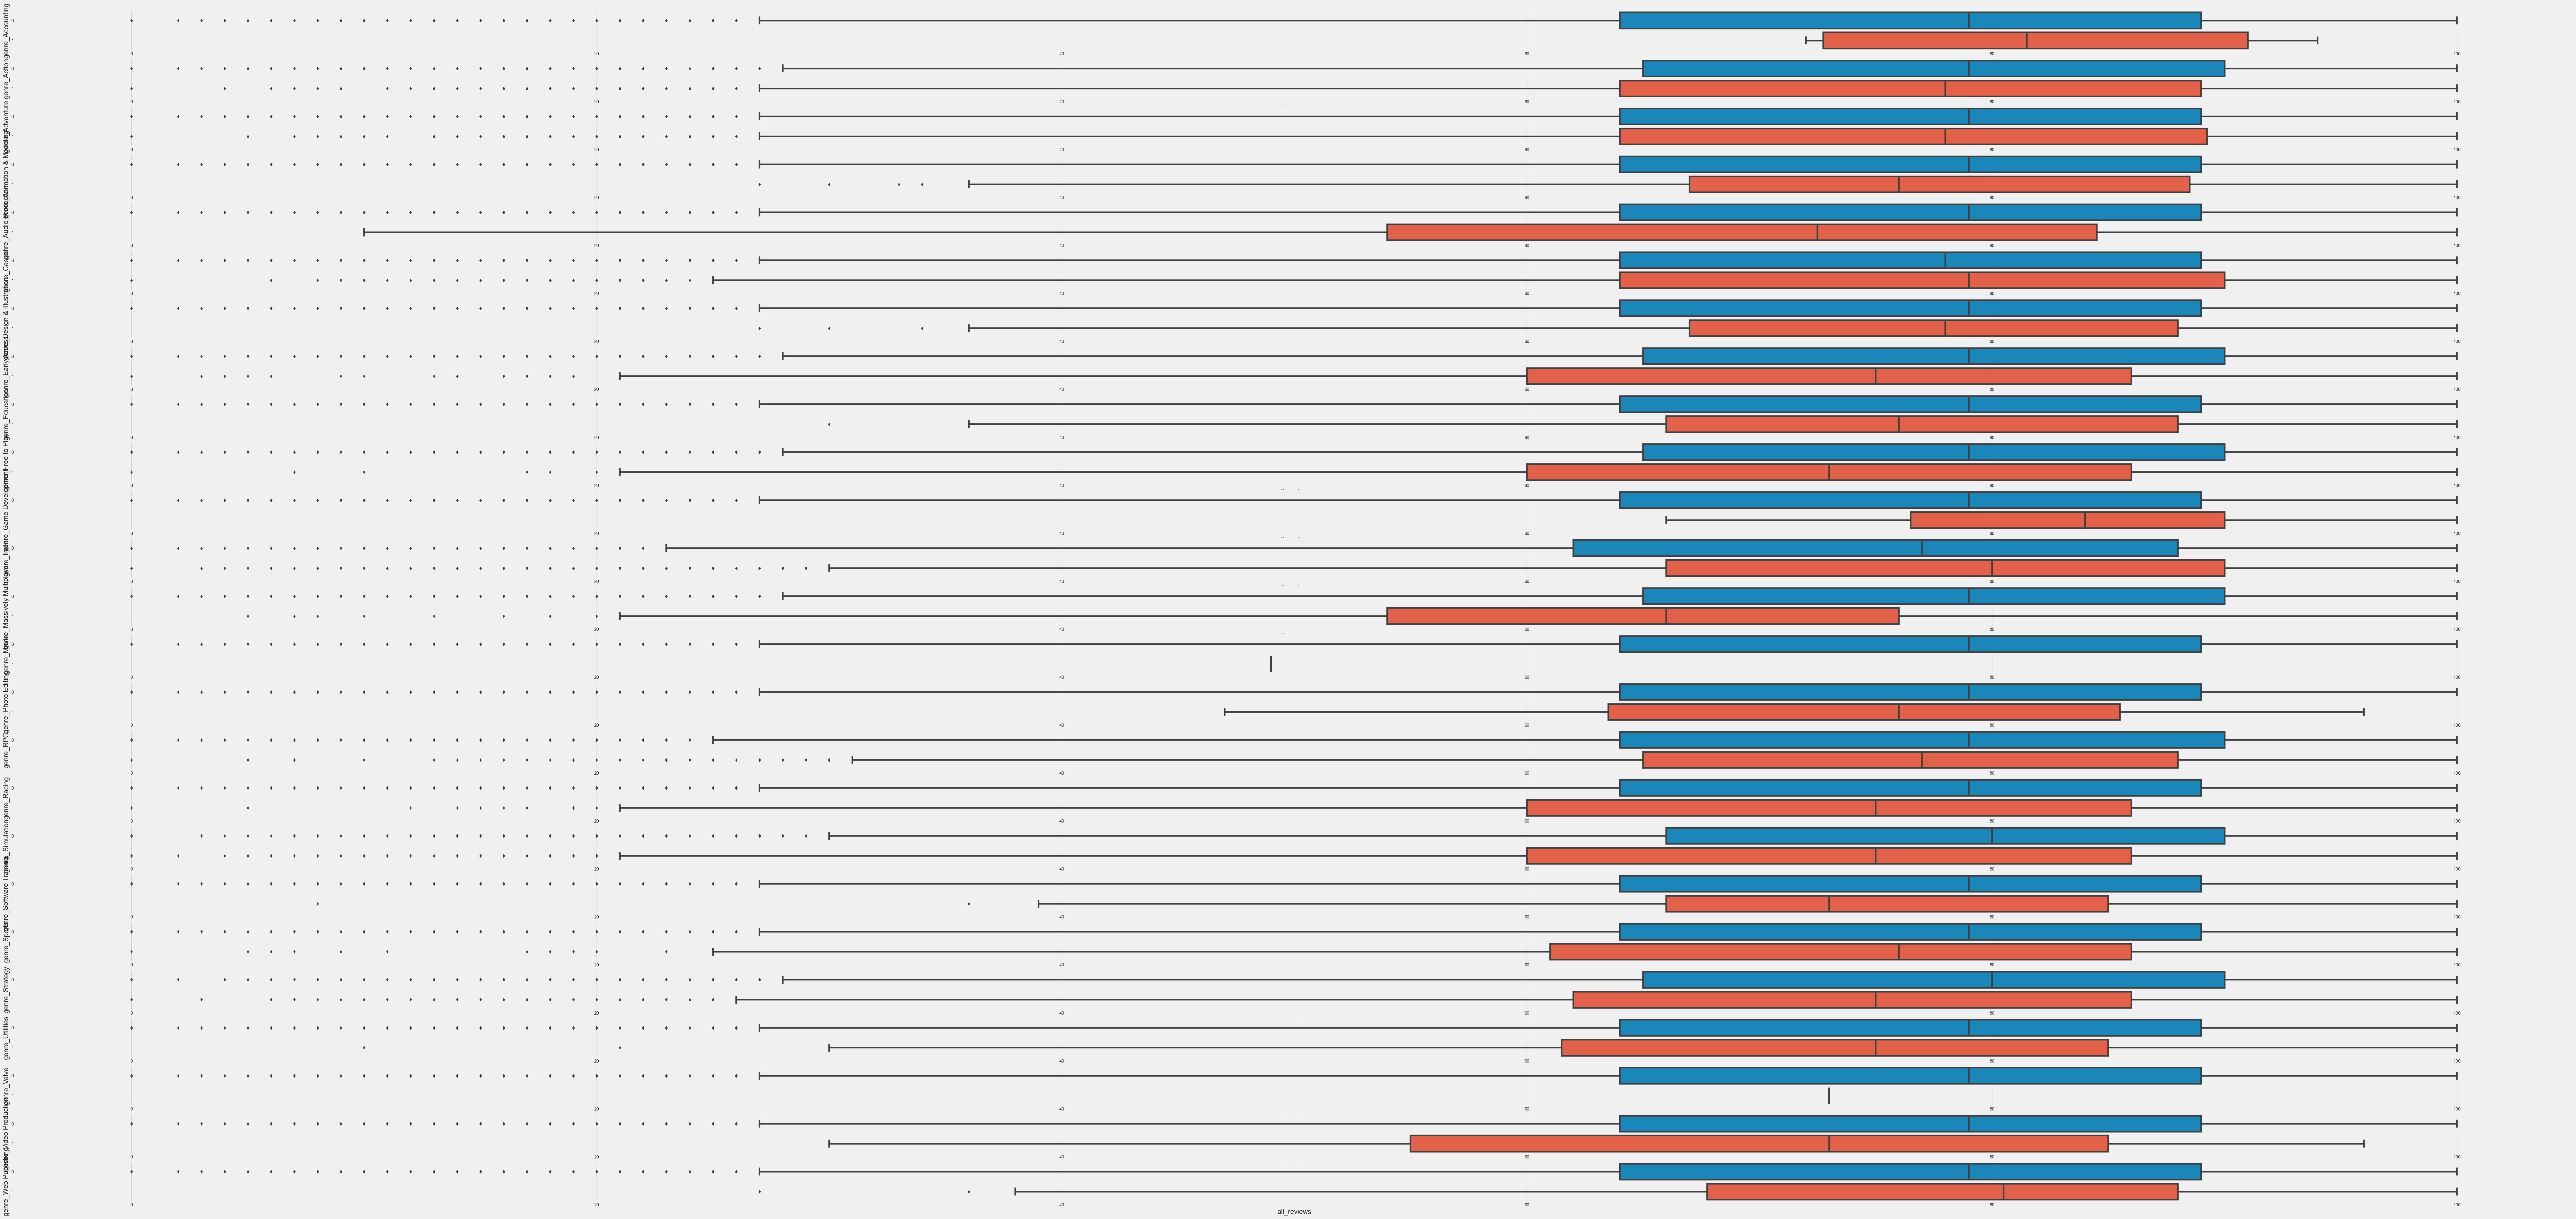

In [112]:
# all genre vs all reviews
f, axes = plt.subplots(25, 1, figsize=(100, 50))

i=0
for thegenre in allgenre:
    sb.boxplot(x = "all_reviews", y = thegenre , data = jointDF, orient = "h", width = 0.8, ax = axes[i])
    i+=1

















C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)


<AxesSubplot:xlabel='all_reviews', ylabel='genre_Adventure'>

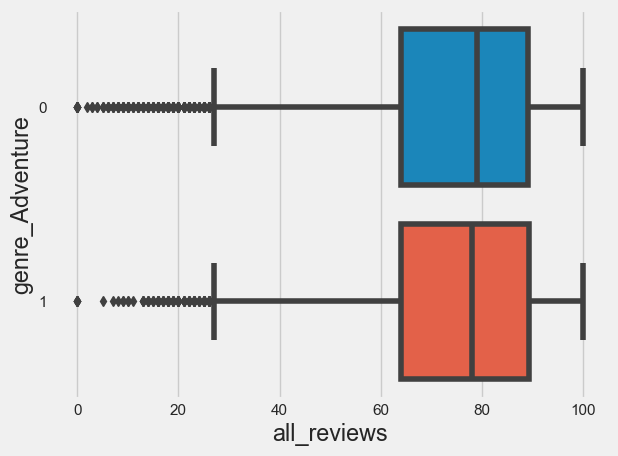

In [98]:


sb.boxplot(x = "all_reviews", y = 'genre_Adventure' , data = jointDF, orient = "h", width = 0.8)